# Maximum Cut on word2vec

## References

- https://en.wikipedia.org/wiki/Maximum_cut
- https://qiita.com/s_zh/items/ecbd82ff9e440d9e522e

In [ ]:
# Source: https://aial.shiroyagi.co.jp/2017/02/japanese-word2vec-model-builder/
!mkdir ../data
!wget -P '../data' 'http://public.shiroyagi.s3.amazonaws.com/latest-ja-word2vec-gensim-model.zip'
!unzip -d '../data' '../data/latest-ja-word2vec-gensim-model.zip'

In [1]:
from gensim.models import word2vec

model_file = '../data/word2vec.gensim.model'
model = word2vec.Word2Vec.load(model_file)

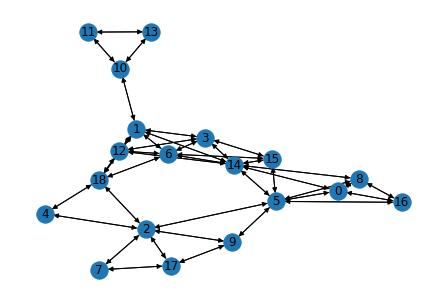

In [2]:
import networkx as nx

def init_graph(word_list, model, edge_type='discrete'):
    wv = model.wv

    gph = nx.DiGraph()
    for idx, x in enumerate(word_list):
        gph.add_node(idx)
        for idy, y in enumerate(word_list):
            if edge_type == 'discrete' and y != x and wv.similarity(x, y) > 0.5:
                gph.add_edge(idx, idy)
    return gph

word_list = ['易', '理論', '製図', '計算', 'CAD', '算盤', '数学',
             '測量', '算', '大工', '集大成', '手本', '関数', '模範',
             '算術', '暗算', '釈', '土木', 'コンピュータ']
word_graph = init_graph(word_list, model)

pos = nx.drawing.layout.spring_layout(word_graph)
nx.draw(word_graph, pos, with_labels=True)

In [3]:
import dwave_networkx as dnx
from neal import SimulatedAnnealingSampler

sampler = SimulatedAnnealingSampler()
result = dnx.maximum_cut(word_graph, sampler)

print(result)
print(len(result), [word_list[i] for i in result])

{3, 5, 7, 9, 10, 13, 14, 16, 18}
9 ['計算', '算盤', '測量', '大工', '集大成', '模範', '算術', '釈', 'コンピュータ']


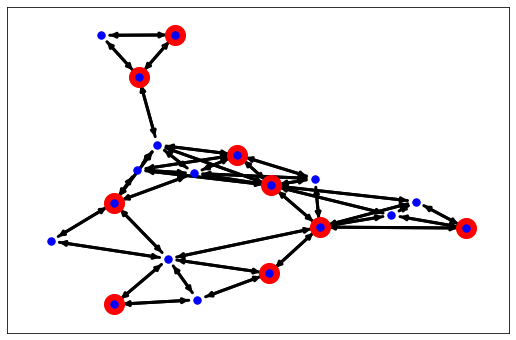

In [4]:
import matplotlib.pyplot as plt

def show_result(result, word_graph):
    plt.figure(figsize=(9, 6))
    nx.draw_networkx_nodes(word_graph, pos, node_size=400, nodelist=result, node_color='r')
    nx.draw_networkx_nodes(word_graph, pos, node_size=55, nodelist=range(0, 19), node_color='b')
    nx.draw_networkx_edges(word_graph, pos, alpha=1, width=3)
    plt.show()

show_result(result, word_graph)